In [1]:
pip install geopandas rasterio shapely opencv-python matplotlib tensorflow keras

     ------------------------------------ 323.6/323.6 kB 771.8 kB/s eta 0:00:00
     -------------------------------------- 25.4/25.4 MB 845.8 kB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 996.8 kB/s eta 0:00:00
     ---------------------------------------- 19.2/19.2 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 1.4 MB/s eta 0:00:00
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.6.0
    Uninstalling typing_extensions-4.6.0:
      Successfully uninstalled typing_extensions-4.6.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.8.0 requires typing-extensions>=4.10.0, but you have typing-extensions 4.5.0 which is incompatible.


In [2]:
pip install opencv-python matplotlib numpy tensorflow scikit-learn


Note: you may need to restart the kernel to use updated packages.


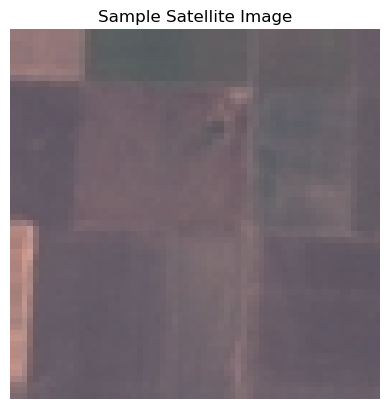

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


dataset_path = "Flood detection\EuroSAT\AnnualCrop"


files = os.listdir(dataset_path)
sample_img = cv2.imread(os.path.join(dataset_path, files[0]))
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

plt.imshow(sample_img)
plt.title("Sample Satellite Image")
plt.axis("off")
plt.show()


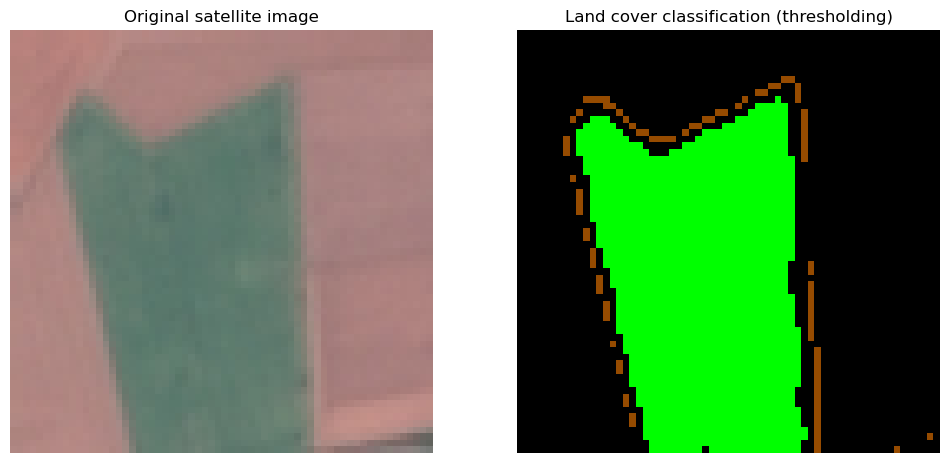

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("Desktop\Flood detection\EuroSAT\AnnualCrop\AnnualCrop_14.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

lower_green = np.array([35, 40, 20])
upper_green = np.array([85, 255, 255])

lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])


lower_brown = np.array([10, 20, 20])
upper_brown = np.array([25, 255, 200])

mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_brown = cv2.inRange(hsv, lower_brown, upper_brown)


classification = np.zeros_like(image)

classification[mask_green > 0] = [0, 255, 0]     
classification[mask_blue > 0] = [0, 0, 255]      
classification[mask_brown > 0] = [150, 75, 0]    

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original satellite image")
plt.axis("off")


plt.subplot(1,2,2)
plt.imshow(classification)
plt.title("Land cover classification (thresholding)")
plt.axis("off")

plt.show()



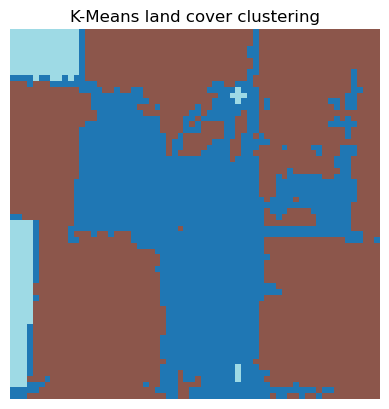

FileNotFoundError: [Errno 2] No such file or directory: 'results/output1.png'

<Figure size 640x480 with 0 Axes>

In [11]:
from sklearn.cluster import KMeans

pixels = sample_img.reshape(-1, 3)

kmeans = KMeans(n_clusters=3, random_state=42).fit(pixels)
labels = kmeans.labels_.reshape(sample_img.shape[:2])

plt.imshow(labels, cmap='tab20')
plt.title("K-Means land cover clustering")
plt.axis("off")
plt.show()

